In [29]:
!jt -t grade3 -ofs 11 -cellw 1400 -T -N -kl 

# Import dependencies + Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data/from-jan-2015-onward-scaled.csv")

In [3]:
# remove unnamed column
# data = data.iloc[:, 1:]

In [4]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_resale_price,scaled_storey_range,scaled_latitude,scaled_longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,8,60.0,Improved,1986,70.000000,...,-1.542079,-0.569175,-0.363679,-1.237364,-0.081788,0.193734,-0.017583,893.278432,988.960998,210.896670
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,2,68.0,New Generation,1981,65.000000,...,-1.212248,-0.977903,-0.775289,-1.102024,-1.151769,0.166323,0.231787,813.149646,718.272789,420.358229
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,2,69.0,New Generation,1980,64.000000,...,-1.171019,-1.059649,-0.857611,-1.034354,-1.151769,0.157602,-0.009860,796.220278,1063.134486,350.034254
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,2,68.0,New Generation,1979,63.000000,...,-1.212248,-1.141395,-0.939933,-1.000519,-1.151769,0.022595,0.228126,706.917955,619.745373,344.590308
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,8,68.0,New Generation,1980,64.000000,...,-1.212248,-1.059649,-0.857611,-1.000519,-0.081788,0.112748,0.261080,952.440214,830.384131,598.219907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112621,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,146.0,Maisonette,1987,66.250000,...,2.003607,-0.487429,-0.672386,0.928075,0.453202,1.272324,-0.020104,505.612523,591.915129,259.180290
112622,2020-07,YISHUN,EXECUTIVE,614,YISHUN ST 61,5,146.0,Maisonette,1987,65.833333,...,2.003607,-0.487429,-0.706687,0.886715,-0.616778,1.237192,-0.039559,551.632112,387.499221,168.191064
112623,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,142.0,Apartment,1987,66.166667,...,1.838691,-0.487429,-0.679247,0.691230,0.453202,1.272324,-0.020104,505.612523,591.915129,259.180290
112624,2020-07,YISHUN,EXECUTIVE,724,YISHUN ST 71,5,145.0,Apartment,1986,65.000000,...,1.962378,-0.569175,-0.775289,0.657395,-0.616778,1.392218,-0.124286,636.188617,603.995412,130.089262


In [5]:
data['full_address']

0          ANG MO KIO AVE 4 BLOCK 174
1         ANG MO KIO AVE 10 BLOCK 541
2          ANG MO KIO AVE 4 BLOCK 163
3         ANG MO KIO AVE 10 BLOCK 446
4         ANG MO KIO AVE 10 BLOCK 557
                     ...             
112621         YISHUN ST 61 BLOCK 643
112622         YISHUN ST 61 BLOCK 614
112623         YISHUN ST 61 BLOCK 643
112624         YISHUN ST 71 BLOCK 724
112625         YISHUN ST 61 BLOCK 633
Name: full_address, Length: 112626, dtype: object

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder();

# label encoding "town"
data['town_encode'] = le.fit_transform(data['town'])

# label encoding "flat_type"
data['flat_type_encode'] = le.fit_transform(data['flat_type'])

# label encoding "flat_model"
data['flat_model_encode'] = le.fit_transform(data['flat_model'])

In [7]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'new_address', 'latitude',
       'longitude', 'full_address', 'scaled_floor_area_sqm',
       'scaled_lease_commence_date', 'scaled_remaining_lease',
       'scaled_resale_price', 'scaled_storey_range', 'scaled_latitude',
       'scaled_longitude', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistFromSch', 'town_encode', 'flat_type_encode',
       'flat_model_encode'],
      dtype='object')

In [8]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,scaled_resale_price,scaled_storey_range,scaled_latitude,scaled_longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,8,60.0,Improved,1986,70.000000,...,-1.237364,-0.081788,0.193734,-0.017583,893.278432,988.960998,210.896670,0,2,4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,2,68.0,New Generation,1981,65.000000,...,-1.102024,-1.151769,0.166323,0.231787,813.149646,718.272789,420.358229,0,2,11
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,2,69.0,New Generation,1980,64.000000,...,-1.034354,-1.151769,0.157602,-0.009860,796.220278,1063.134486,350.034254,0,2,11
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,2,68.0,New Generation,1979,63.000000,...,-1.000519,-1.151769,0.022595,0.228126,706.917955,619.745373,344.590308,0,2,11
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,8,68.0,New Generation,1980,64.000000,...,-1.000519,-0.081788,0.112748,0.261080,952.440214,830.384131,598.219907,0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112621,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,146.0,Maisonette,1987,66.250000,...,0.928075,0.453202,1.272324,-0.020104,505.612523,591.915129,259.180290,25,5,6
112622,2020-07,YISHUN,EXECUTIVE,614,YISHUN ST 61,5,146.0,Maisonette,1987,65.833333,...,0.886715,-0.616778,1.237192,-0.039559,551.632112,387.499221,168.191064,25,5,6
112623,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,142.0,Apartment,1987,66.166667,...,0.691230,0.453202,1.272324,-0.020104,505.612523,591.915129,259.180290,25,5,2
112624,2020-07,YISHUN,EXECUTIVE,724,YISHUN ST 71,5,145.0,Apartment,1986,65.000000,...,0.657395,-0.616778,1.392218,-0.124286,636.188617,603.995412,130.089262,25,5,2


In [9]:
data['year'] = data['month'].apply(lambda x: x[:4])
data['only_month'] = data['month'].apply(lambda x: x[5:])

In [10]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,scaled_latitude,scaled_longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode,year,only_month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,8,60.0,Improved,1986,70.000000,...,0.193734,-0.017583,893.278432,988.960998,210.896670,0,2,4,2015,01
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,2,68.0,New Generation,1981,65.000000,...,0.166323,0.231787,813.149646,718.272789,420.358229,0,2,11,2015,01
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,2,69.0,New Generation,1980,64.000000,...,0.157602,-0.009860,796.220278,1063.134486,350.034254,0,2,11,2015,01
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,2,68.0,New Generation,1979,63.000000,...,0.022595,0.228126,706.917955,619.745373,344.590308,0,2,11,2015,01
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,8,68.0,New Generation,1980,64.000000,...,0.112748,0.261080,952.440214,830.384131,598.219907,0,2,11,2015,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112621,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,146.0,Maisonette,1987,66.250000,...,1.272324,-0.020104,505.612523,591.915129,259.180290,25,5,6,2020,07
112622,2020-07,YISHUN,EXECUTIVE,614,YISHUN ST 61,5,146.0,Maisonette,1987,65.833333,...,1.237192,-0.039559,551.632112,387.499221,168.191064,25,5,6,2020,07
112623,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,11,142.0,Apartment,1987,66.166667,...,1.272324,-0.020104,505.612523,591.915129,259.180290,25,5,2,2020,07
112624,2020-07,YISHUN,EXECUTIVE,724,YISHUN ST 71,5,145.0,Apartment,1986,65.000000,...,1.392218,-0.124286,636.188617,603.995412,130.089262,25,5,2,2020,07


In [11]:
data['year'].value_counts()

2019    22186
2018    21561
2017    20509
2016    19373
2015    17780
2020    11217
Name: year, dtype: int64

In [12]:
data['only_month'].value_counts()

07    12029
06    11585
03    10379
05     9549
04     9470
10     9409
08     9260
11     8806
09     8661
01     8248
12     7646
02     7584
Name: only_month, dtype: int64

In [42]:
# code to get mature or not mature estate
def is_mature(town):
    
    not_mature = ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'PUNGGOL',
             'SEMBAWANG', 'SENGKANG', 'WOODLANDS', 'YISHUN']
    mature = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG',
                 'KALLANG/WHAMPOA', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'MARINE PARADE']
    
    if town in mature:
        return 1
    elif town in not_mature:
        return 0

In [43]:
data['is_mature'] = data['town'].apply(lambda x: is_mature(x))

In [44]:
data['is_mature'].value_counts()

0    63813
1    48813
Name: is_mature, dtype: int64

In [45]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,scaled_longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode,year,only_month,is_mature
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,8,60.0,Improved,1986,70.0,...,-0.017583,893.278432,988.960998,210.896670,0,2,4,2015,01,1
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,2,68.0,New Generation,1981,65.0,...,0.231787,813.149646,718.272789,420.358229,0,2,11,2015,01,1
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,2,69.0,New Generation,1980,64.0,...,-0.009860,796.220278,1063.134486,350.034254,0,2,11,2015,01,1
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,2,68.0,New Generation,1979,63.0,...,0.228126,706.917955,619.745373,344.590308,0,2,11,2015,01,1
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,8,68.0,New Generation,1980,64.0,...,0.261080,952.440214,830.384131,598.219907,0,2,11,2015,01,1


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# test code
# data = [[0, 0], [0, 0], [1, 1], [1,1], [99,99]]
# scaler.fit_transform(data)

In [ ]:
data.head()

In [53]:
# clearing the dataframe to columns that will be used for training
data2 = data.copy()
data2.drop(columns=['town', 'flat_type', 'block', 'street_name', 
                    'lease_commence_date', 'flat_model', 'new_address', 'latitude',
                    'longitude', 'scaled_floor_area_sqm', 'scaled_resale_price', 'scaled_storey_range',
                    'scaled_latitude', 'scaled_longitude', 'scaled_remaining_lease', 'scaled_lease_commence_date',
                    'full_address','month'
                   ], inplace=True)                       

data2.head() 

,storey_range,floor_area_sqm,remaining_lease,resale_price,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode,year,only_month,is_mature
0,8,60.0,70.0,255000.0,893.278432,988.960998,210.896670,0,2,4,2015,01,1
1,2,68.0,65.0,275000.0,813.149646,718.272789,420.358229,0,2,11,2015,01,1
2,2,69.0,64.0,285000.0,796.220278,1063.134486,350.034254,0,2,11,2015,01,1
3,2,68.0,63.0,290000.0,706.917955,619.745373,344.590308,0,2,11,2015,01,1
4,8,68.0,64.0,290000.0,952.440214,830.384131,598.219907,0,2,11,2015,01,1


In [54]:
data2.to_csv('data/data_v1.csv')

In [55]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,scaled_longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode,year,only_month,is_mature
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,8,60.0,Improved,1986,70.0,...,-0.017583,893.278432,988.960998,210.896670,0,2,4,2015,01,1
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,2,68.0,New Generation,1981,65.0,...,0.231787,813.149646,718.272789,420.358229,0,2,11,2015,01,1
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,2,69.0,New Generation,1980,64.0,...,-0.009860,796.220278,1063.134486,350.034254,0,2,11,2015,01,1
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,2,68.0,New Generation,1979,63.0,...,0.228126,706.917955,619.745373,344.590308,0,2,11,2015,01,1
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,8,68.0,New Generation,1980,64.0,...,0.261080,952.440214,830.384131,598.219907,0,2,11,2015,01,1


In [57]:
# data.to_csv('data/data_all.csv')

In [58]:
test = pd.read_csv('data/data.csv')

In [60]:
test.columns

Index(['Unnamed: 0', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'new_address', 'latitude',
       'longitude', 'full_address', 'scaled_floor_area_sqm',
       'scaled_lease_commence_date', 'scaled_remaining_lease',
       'scaled_resale_price', 'scaled_storey_range', 'scaled_latitude',
       'scaled_longitude', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistFromSch', 'town_encode', 'flat_type_encode',
       'flat_model_encode'],
      dtype='object')

# Create pre-processed dataframe for submission

In [56]:
data_all = pd.read_csv('data/data_all.csv', index_col=False)
data_all.drop(columns=[ 'scaled_floor_area_sqm', 'scaled_resale_price', 'scaled_storey_range', 'full_address',
                       'scaled_latitude', 'scaled_longitude', 'scaled_remaining_lease', 'scaled_lease_commence_date',
                      'year','only_month'], inplace=True)                       
data_all.rename(columns={'storey_range': 'mean_storey_range'}, inplace=True)
temp = pd.read_csv('data/from-jan-2015-onward.csv')
data_all['storey_range'] = temp['storey_range']
data_all['temp'] = data_all['mean_storey_range']
data_all['mean_storey_range'] = data_all['storey_range']
data_all['storey_range'] = data_all['temp']
data_all.drop(columns=['temp'], inplace=True)
data_all.rename(columns={'mean_storey_range': 'temp'}, inplace=True)
data_all.rename(columns={'storey_range': 'mean_storey_range'}, inplace=True)
data_all.rename(columns={'temp': 'storey_range'}, inplace=True)
data_all.rename(columns={'new_address': 'full_address'}, inplace=True)
data_all.rename(columns={'minDistFromSch': 'minDistanceFromSch'}, inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder();
# label encoding "month"
data_all['month_encode'] = le.fit_transform(data_all['month'])
data_all.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,longitude,minDistanceFromMall,minDistanceFromMrt,minDistanceFromSch,town_encode,flat_type_encode,flat_model_encode,is_mature,mean_storey_range,month_encode
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70.0,...,103.837619,893.278432,988.960998,210.896670,0,2,4,1,8,0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65.0,...,103.855621,813.149646,718.272789,420.358229,0,2,11,1,2,0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64.0,...,103.838177,796.220278,1063.134486,350.034254,0,2,11,1,2,0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63.0,...,103.855357,706.917955,619.745373,344.590308,0,2,11,1,2,0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64.0,...,103.857736,952.440214,830.384131,598.219907,0,2,11,1,8,0


In [57]:
data_all.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'full_address', 'latitude',
       'longitude', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistanceFromSch', 'town_encode', 'flat_type_encode',
       'flat_model_encode', 'is_mature', 'mean_storey_range', 'month_encode'],
      dtype='object')

In [59]:
data_all.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease        float64
resale_price           float64
full_address            object
latitude               float64
longitude              float64
minDistanceFromMall    float64
minDistanceFromMrt     float64
minDistanceFromSch     float64
town_encode              int64
flat_type_encode         int64
flat_model_encode        int64
is_mature                int64
mean_storey_range        int64
month_encode             int64
dtype: object

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data_all)

ValueError: could not convert string to float: '2015-01'

In [58]:
data_all.to_csv('data/data_main.csv', index=False)

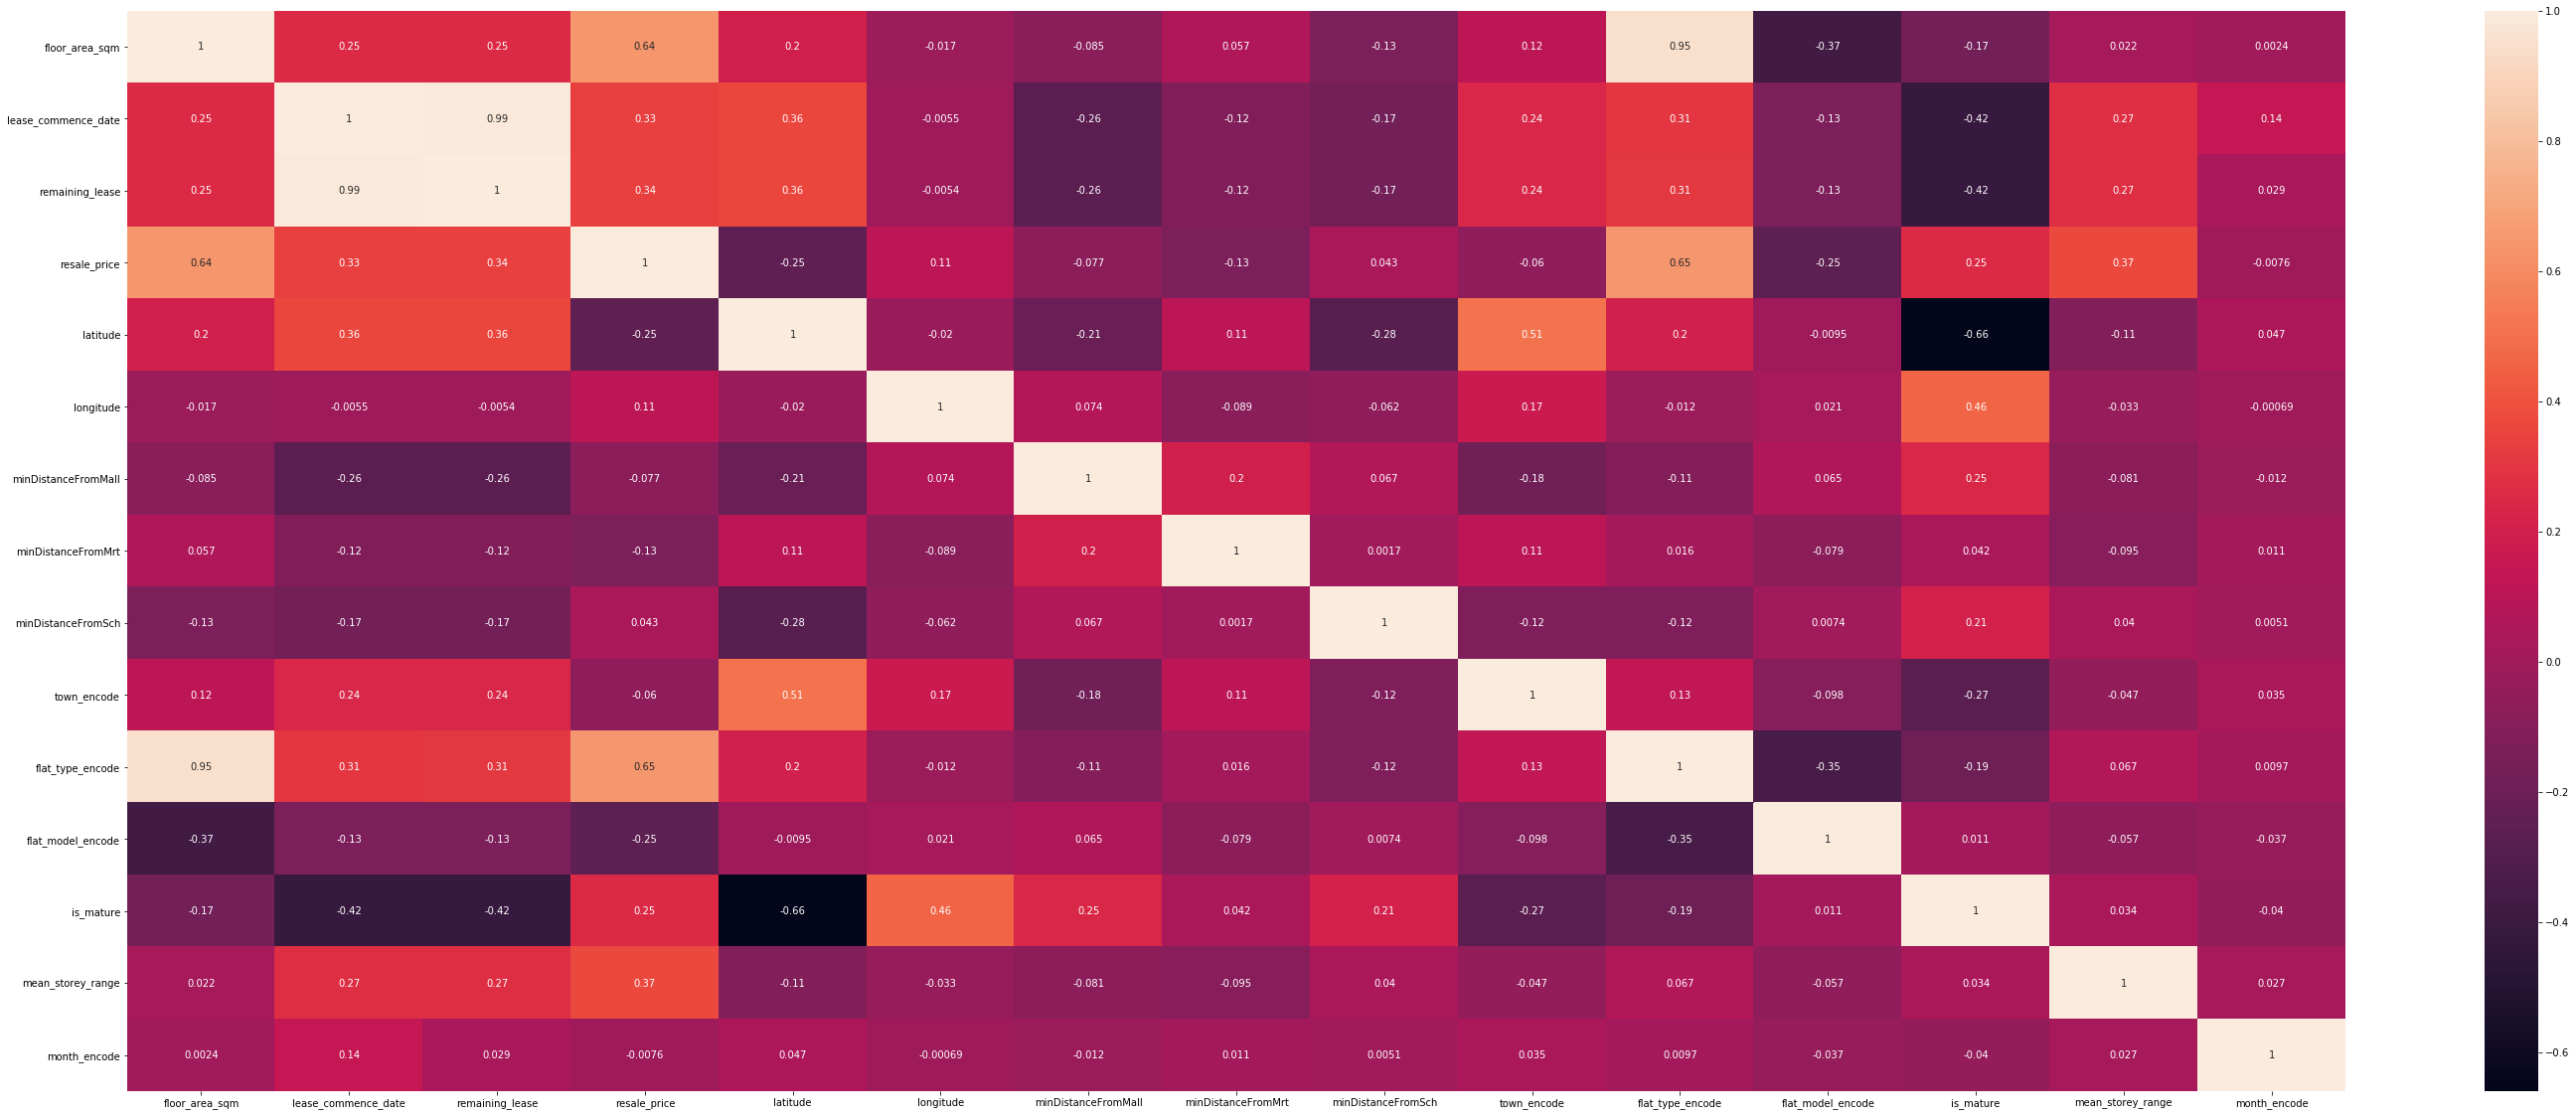

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(50,20))
sns.heatmap(data_all.corr(), annot=True)
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = [[0,20, 50], [1,21, 55], [2,22, 60], [3,23, 61], [4,24, 70]]
t = pd.DataFrame(data)
x = pd.DataFrame(scaler.fit_transform(t))

In [94]:
t

,0,1,2
0,0,20,50
1,1,21,55
2,2,22,60
3,3,23,61
4,4,24,70


In [89]:
x

,0,1,2
0,-1.414214,-1.414214,-1.378209
1,-0.707107,-0.707107,-0.629183
2,0.000000,0.000000,0.119844
3,0.707107,0.707107,0.269650
4,1.414214,1.414214,1.617898


In [95]:
t[3] = t[2] - t[1]

In [96]:
t

,0,1,2,3
0,0,20,50,30
1,1,21,55,34
2,2,22,60,38
3,3,23,61,38
4,4,24,70,46


In [91]:
x[3] = x[2]-x[1]

In [92]:
x

,0,1,2,3
0,-1.414214,-1.414214,-1.378209,0.036004
1,-0.707107,-0.707107,-0.629183,0.077924
2,0.000000,0.000000,0.119844,0.119844
3,0.707107,0.707107,0.269650,-0.437457
4,1.414214,1.414214,1.617898,0.203685


In [97]:

scaler.inverse_transform(x.iloc[:, 1:])

array([[ 0.        , 20.05091745, 59.44033898],
       [ 1.        , 21.11020144, 59.72016949],
       [ 2.        , 22.16948544, 60.        ],
       [ 3.        , 22.38134224, 56.27983051],
       [ 4.        , 24.28805343, 60.55966102]])

In [100]:
housing_df = pd.read_csv("data/data_main.csv")
housing_df
selected_columns = ["remaining_lease", "resale_price", "minDistanceFromMall", "minDistanceFromMrt", "minDistFromSch","is_mature", "town_encode", "flat_type_encode", "flat_model_encode", "mean_storey","month_encode"]
final_df = housing_df.loc[:,selected_columns]
final_df.head()

,remaining_lease,resale_price,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,is_mature,town_encode,flat_type_encode,flat_model_encode,mean_storey,month_encode
0,70.0,255000.0,893.278432,988.960998,210.896670,1,0,2,4,8,0
1,65.0,275000.0,813.149646,718.272789,420.358229,1,0,2,11,2,0
2,64.0,285000.0,796.220278,1063.134486,350.034254,1,0,2,11,2,0
3,63.0,290000.0,706.917955,619.745373,344.590308,1,0,2,11,2,0
4,64.0,290000.0,952.440214,830.384131,598.219907,1,0,2,11,8,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

housing_df = pd.read_csv("data/data_main.csv")

selected_columns = ["remaining_lease", "resale_price", "minDistanceFromMall", "minDistanceFromMrt", "minDistFromSch","is_mature", "town_encode", "flat_type_encode", "flat_model_encode", "mean_storey","month_encode"]
final_df = housing_df.loc[:,selected_columns]
final_df.head()

scaler = StandardScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_df),columns=selected_columns)
final_df.head()

dependant_var = "resale_price"
y = final_df[dependant_var]
column_names = []
for column in final_df.columns:
    if column != dependant_var:
        column_names.append(column)
x = final_df[column_names]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=424)

# rf_gscv = RandomForestRegressor(random_state=424)
# param = {
#     #'n_estimators': [100, 300, 500, 800, None], 
#             #'max_depth': [10, 30, 50, 70, 90, None],
#             'bootstrap': [True],
#             'min_samples_split': [2,20,200, 2000],
#             'min_samples_leaf': [1, 10, 100, 1000]
#             }
        
# clf = GridSearchCV(rf_gscv,param, cv=5, n_jobs=-1)
# clf.fit(x_train, y_train)

In [118]:
from sklearn import metrics
rf_optimized = clf.best_estimator_
print(rf_optimized)
rf_optimized.fit(x_train,y_train)
rf_optimized_pred = rf_optimized.predict(x_test)
rf_optimized_mse = metrics.mean_squared_error(y_test, rf_optimized_pred)
print(rf_optimized_mse)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)
0.034532684027038116


# Non-hyperparameter tuned MSE

In [120]:
best_rf = RandomForestRegressor()
best_rf.fit(x_train,y_train)
best_rf_pred = best_rf.predict(x_test)
best_rf_mse = metrics.mean_squared_error(y_test, best_rf_pred)
print(best_rf_mse)

0.03457736772496069


In [ ]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=775, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified sampling
# flat_type_encode use for strata criteria as it is the correlated with target variable
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.1, test_size=0.025, random_state=424)
for train_index, test_index in sss.split(final_df, final_df['flat_type_encode']):
    sss_train = final_df.loc[train_index]
    sss_test = final_df.loc[test_index]
    
selected_columns = ["remaining_lease", "minDistanceFromMall", "minDistanceFromMrt", "minDistFromSch","is_mature", "town_encode", "flat_type_encode", "flat_model_encode", "mean_storey","month_encode"]
sss_x_train = sss_train[selected_columns]
sss_y_train = sss_train["resale_price"]
sss_x_test = sss_test[selected_columns]
sss_y_test = sss_test['resale_price']

# GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
rf_gscv = RandomForestRegressor(random_state=424)
param = {
    'n_estimators': [500, 800, 900]
            'max_depth': [30, 50, 70, None],
            'bootstrap': [True],
            'min_samples_split': [2],
            'min_samples_leaf': [1]
            }
        
gscv_clf = GridSearchCV(rf_gscv,param, cv=5, n_jobs=-1, verbose=2)
gscv_clf.fit(sss_x_train, sss_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=424,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [22]:
gscv_clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)

In [34]:
gscv_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=-1, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)
gscv_rf.fit(x_train, y_train)
gscv_rf_mse = metrics.mean_squared_error(y_test, gscv_rf.predict(x_test))
print(gscv_rf_mse)

0.03421867705048775


In [35]:
metrics.mean_absolute_error(y_test, gscv_rf.predict(x_test))

0.13103047252811337

In [32]:
gscv_rf_test = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=-1, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)
gscv_rf_test.fit(x_train, y_train)
gscv_rf_test_mse = metrics.mean_squared_error(y_test, gscv_rf_test.predict(x_test))
print(gscv_rf_test_mse)

0.03419456868392983


# RandomizedSearchCV

In [13]:
#randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=424, n_jobs = -1)

rf_random.fit(sss_x_train, sss_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [14]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=775, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
rscv_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=775, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rscv_rf.fit(x_train, y_train)

NameError: name 'metrics' is not defined

In [16]:
from sklearn import metrics
rscv_rf_mse = metrics.mean_squared_error(y_test, rscv_rf.predict(x_test))
print(rscv_rf_mse)

0.03418074850709494


In [43]:
scaler = StandardScaler()
scaler.fit_transform([1,2], [3,4], [5,6])

array([[0., 0., 0., 0.]])

In [44]:
rscv_rf.feature_importances_

array([0.15081107, 0.02581348, 0.03753714, 0.01509489, 0.17689251,
       0.06770936, 0.45263233, 0.02603026, 0.03274444, 0.01473452])

In [45]:
x_train

,remaining_lease,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,is_mature,town_encode,flat_type_encode,flat_model_encode,mean_storey,month_encode
33582,1.694373,-0.249916,-1.332619,0.233136,-0.874607,0.404155,0.949998,1.140404,0.453202,-0.697505
95989,0.404660,-0.776461,0.867704,-1.217727,-0.874607,-0.714589,-0.131574,1.140404,0.453202,1.200913
41711,-0.356819,-0.220394,-0.998297,0.150031,-0.874607,-1.087504,-0.131574,-0.207945,-0.616778,-0.381102
106287,0.336059,-1.457583,-1.427715,-0.496912,-0.874607,0.777069,-0.131574,-0.207945,1.523183,1.464582
60862,-0.521463,1.233711,-0.622777,-1.307158,1.143370,0.031240,-0.131574,1.949413,-0.616778,0.198970
...,...,...,...,...,...,...,...,...,...,...
92906,0.589885,0.411769,-0.677356,-0.659627,-0.874607,0.777069,-0.131574,-0.207945,-0.616778,1.095445
23710,-0.363679,0.023493,-0.697572,-0.497103,-0.874607,1.398594,-0.131574,-0.207945,-0.616778,-1.013907
17434,-0.775289,0.239127,0.167490,1.097895,1.143370,1.025679,-1.213145,-0.207945,-1.151769,-1.224843
55824,1.660072,0.615944,0.830278,1.000128,-0.874607,1.274289,-1.213145,-0.207945,1.523183,-0.011965


In [ ]:
def elasticnet_model(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import ElasticNet
    ENreg = ElasticNet()
    ENreg.fit(x_train,y_train)
    Epred = ENreg.predict(x_test)
    elastic_mse = metrics.mean_squared_error(y_test, Epred)
    return elastic_mse

In [5]:
housing_df = pd.read_csv('data/data_main.csv')
housing_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,longitude,minDistanceFromMall,minDistanceFromMrt,minDistFromSch,town_encode,flat_type_encode,flat_model_encode,is_mature,mean_storey,month_encode
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70.0,...,103.837619,893.278432,988.960998,210.896670,0,2,4,1,8,0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65.0,...,103.855621,813.149646,718.272789,420.358229,0,2,11,1,2,0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64.0,...,103.838177,796.220278,1063.134486,350.034254,0,2,11,1,2,0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63.0,...,103.855357,706.917955,619.745373,344.590308,0,2,11,1,2,0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64.0,...,103.857736,952.440214,830.384131,598.219907,0,2,11,1,8,0


In [7]:
housing_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'full_address', 'latitude',
       'longitude', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistFromSch', 'town_encode', 'flat_type_encode',
       'flat_model_encode', 'is_mature', 'mean_storey', 'month_encode'],
      dtype='object')

In [8]:
housing_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease        float64
resale_price           float64
full_address            object
latitude               float64
longitude              float64
minDistanceFromMall    float64
minDistanceFromMrt     float64
minDistFromSch         float64
town_encode              int64
flat_type_encode         int64
flat_model_encode        int64
is_mature                int64
mean_storey              int64
month_encode             int64
dtype: object

In [9]:
housing_df['flat_model'].value_counts()

Model A                   35814
Improved                  28359
New Generation            16800
Premium Apartment         11638
Simplified                 5061
Apartment                  4465
Standard                   3300
Maisonette                 3257
Model A2                   1582
DBSS                       1412
Type S1                     266
Model A-Maisonette          196
Adjoined flat               191
Type S2                     124
Terrace                      66
Multi Generation             39
Premium Apartment Loft       26
Improved-Maisonette          17
Premium Maisonette           10
2-room                        3
Name: flat_model, dtype: int64

In [11]:
housing_df['longitude'].isnull().any()

False

In [25]:
test = pd.DataFrame( {
    'col1': [1,2,3,4],
    'col2': [4,5,6,7],
    'target': [4,5,6,7],
    'predict' : [7,8,9,10]
})
test.head()

,col1,col2,target,predict
0,1,4,4,7
1,2,5,5,8
2,3,6,6,9
3,4,7,7,10


In [44]:
predict = pd.DataFrame( {
    'predict' : [-1.324,-0.4325,0.6432]
})

In [42]:
predict.astype('float64')

,predict
0,-1.3240
1,-0.4325
2,0.6432
3,1.4324


In [37]:
predict.values.reshape(-1,1)

array([[ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
scaler_test = StandardScaler().fit(test['target'].values.reshape(-1,1))
test['scaled_target'] = scaler_test.transform(test['target'].values.reshape(-1,1))

In [30]:
test

,col1,col2,target,predict,scaled_target
0,1,4,4,7,-1.341641
1,2,5,5,8,-0.447214
2,3,6,6,9,0.447214
3,4,7,7,10,1.341641


In [45]:
scaler_test.inverse_transform(predict['predict'])

array([4.019723  , 5.0164503 , 6.21911946])